In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

In [15]:
INPUT_DIR = "../data/input/"

train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")

with open('../config/default.json', 'r') as f:
        config = json.load(f)

features = config['features']

AttributeError: 'list' object has no attribute 'dtype'

In [6]:
def clean(df: pd.DataFrame) -> None:
    # DAYS_EMPLOYED anomalies
    df["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)

    # Encode binary categorical features
    for col in ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]:
            df[col].replace({"Y": 1, "N": 0}, inplace=True)
            df[col] = df[col].astype(float)


def generate_basic_features(df: pd.DataFrame) -> pd.DataFrame:
    df["CREDIT_INCOME_RATIO"] = df["AMT_CREDIT"] / (1 + df["AMT_INCOME_TOTAL"])
    df["ANNUITY_INCOME_RATIO"] = df["AMT_ANNUITY"] / (1 + df["AMT_INCOME_TOTAL"])
    df["INCOME_PER_CHILD"] = df["AMT_INCOME_TOTAL"] / (1 + df["CNT_CHILDREN"])
    df["INCOME_PER_FAM_MEMBER"] = df["AMT_INCOME_TOTAL"] / (1 + df["CNT_FAM_MEMBERS"])
    df["CREDIT_TERM"] = df["AMT_ANNUITY"] / (1 + df["AMT_CREDIT"])
    df["DAYS_EMPLOYED_PERC"] = df["DAYS_EMPLOYED"] / (1 + df["DAYS_BIRTH"])
    df["DAYS_REGISTRATION_PERC"] = df["DAYS_REGISTRATION"] / (1 + df["DAYS_BIRTH"])
    df["DAYS_ID_PUBLISH_PERC"] = df["DAYS_ID_PUBLISH"] / (1 + df["DAYS_BIRTH"])
    df["AGE_IN_YEARS"] = (-df["DAYS_BIRTH"] / 365).astype(float)
    df["YEARS_EMPLOYED"] = (-df["DAYS_EMPLOYED"] / 365).astype(float)
    return df

In [7]:
clean(train)
clean(test)

train = generate_basic_features(train)
test = generate_basic_features(test)

In [9]:
train = train[features]
test = test[features]

In [10]:
train.isnull().sum()

EXT_SOURCE_1                   118928
EXT_SOURCE_2                      369
EXT_SOURCE_3                    54586
NAME_CONTRACT_TYPE                  0
AMT_INCOME_TOTAL                    0
OWN_CAR_AGE                    112992
ORGANIZATION_TYPE                   0
DAYS_EMPLOYED                   30898
CREDIT_INCOME_RATIO                 0
ANNUITY_INCOME_RATIO                6
INCOME_PER_CHILD                    0
INCOME_PER_FAM_MEMBER               2
CREDIT_TERM                         6
DAYS_EMPLOYED_PERC              30898
DAYS_REGISTRATION_PERC              0
DAYS_ID_PUBLISH_PERC                0
AGE_IN_YEARS                        0
YEARS_EMPLOYED                  30898
DAYS_LAST_PHONE_CHANGE              1
DEF_60_CNT_SOCIAL_CIRCLE          560
DEF_30_CNT_SOCIAL_CIRCLE          560
AMT_GOODS_PRICE                   163
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REGION_POPULATION_RELATIVE          0
NAME_INCOME_TYPE                    0
NAME_EDUCATI

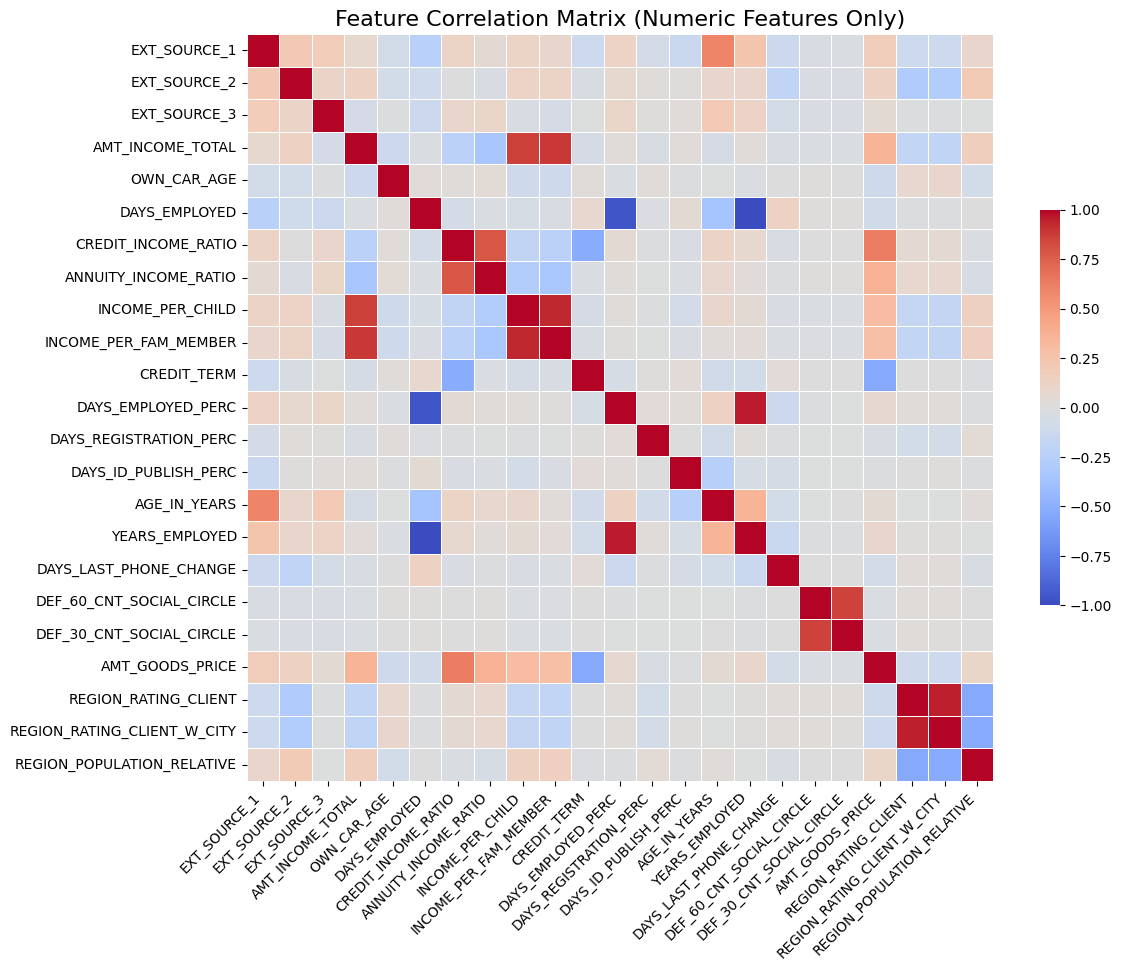

In [11]:
def plot_feature_correlation(df, figsize=(12, 10), annot=False, cmap='coolwarm'):
    """
    指定したDataFrameに含まれる特徴量同士の相関係数行列をヒートマップで可視化する関数。

    Parameters
    ----------
    df : pd.DataFrame
        特徴量が格納されたデータフレーム。
    figsize : tuple, default=(12, 10)
        図の大きさ(width, height)を指定。
    annot : bool, default=False
        Trueにすると、各セル内に相関係数の数値が表示される。
    cmap : str, default='coolwarm'
        ヒートマップで使用するカラーマップ。

    Returns
    -------
    None
    """
    # 数値列のみを抽出
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        raise ValueError("データフレームに数値列がありません。")

    # 相関行列を計算
    corr = numeric_df.corr()

    # 図のサイズを指定
    plt.figure(figsize=figsize)

    # ヒートマップを描画
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, square=True, 
                linewidths=.5, cbar_kws={"shrink": .5})

    plt.title("Feature Correlation Matrix (Numeric Features Only)", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    

plot_feature_correlation(train)

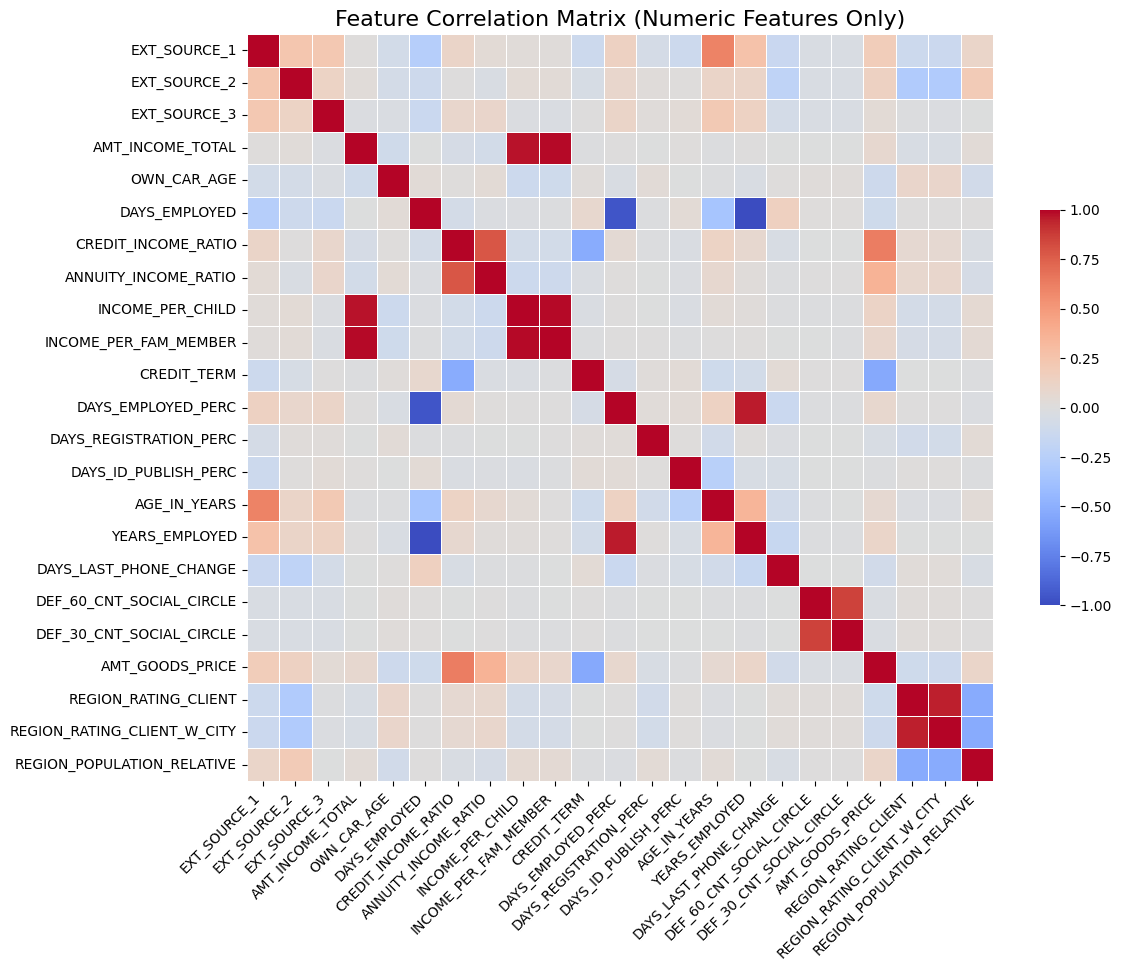

In [13]:
plot_feature_correlation(test)

In [17]:
train = robust_impute(train)

In [18]:
train.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RAT